In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"D:\Dataset\CKD_NephrotoxicDrug_Dataset.csv")
print(df)

      patient_age  gender  bp_systolic  bp_diastolic  blood_urea  \
0              69    Male        136.5          90.4        45.3   
1              32    Male        125.0          62.6        22.4   
2              89  Female        124.2          71.1        36.0   
3              78    Male         98.7          81.6         4.7   
4              38    Male        147.7          81.4        56.6   
...           ...     ...          ...           ...         ...   
1495           31  Female        151.4         100.7        40.2   
1496           29  Female        115.4          71.9        21.6   
1497           29  Female        137.2          82.0        50.9   
1498           30  Female        104.1          80.9        70.1   
1499           42    Male        141.4          90.9        22.1   

      serum_creatinine  albumin  blood_glucose_random  diabetes  hypertension  \
0                 1.42        2                 175.2         0             1   
1                 0.6

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   patient_age                  1500 non-null   int64  
 1   gender                       1500 non-null   object 
 2   bp_systolic                  1500 non-null   float64
 3   bp_diastolic                 1500 non-null   float64
 4   blood_urea                   1500 non-null   float64
 5   serum_creatinine             1500 non-null   float64
 6   albumin                      1500 non-null   int64  
 7   blood_glucose_random         1500 non-null   float64
 8   diabetes                     1500 non-null   int64  
 9   hypertension                 1500 non-null   int64  
 10  drug_name                    1500 non-null   object 
 11  drug_dosage_mg               1500 non-null   int64  
 12  exposure_days                1500 non-null   int64  
 13  nephrotoxic_label 

In [5]:
print(df.ckd_risk_label.unique())

[2 0 1]


In [6]:
df_count = df.groupby(['ckd_risk_label']).agg({'ckd_risk_label': 'count'})
print(df_count)

                ckd_risk_label
ckd_risk_label                
0                          379
1                          728
2                          393


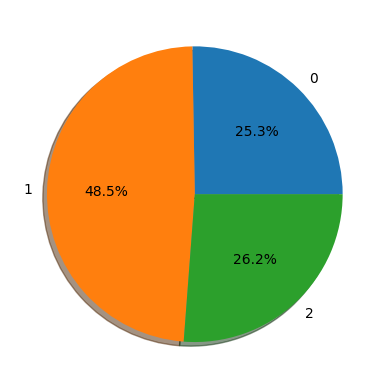

In [7]:
plt.pie(df_count['ckd_risk_label'],labels = df_count.index,autopct='%0.1f%%',shadow = True)
plt.show()

In [8]:
print(df['gender'].value_counts())

gender
Female    776
Male      724
Name: count, dtype: int64


In [9]:
gender_ord = [['Male', 'Female']]

In [10]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder

In [11]:
enc = sklearn.preprocessing.OrdinalEncoder(categories = gender_ord)
df['gender'] = enc.fit_transform(df[['gender']])
print(df)

      patient_age  gender  bp_systolic  bp_diastolic  blood_urea  \
0              69     0.0        136.5          90.4        45.3   
1              32     0.0        125.0          62.6        22.4   
2              89     1.0        124.2          71.1        36.0   
3              78     0.0         98.7          81.6         4.7   
4              38     0.0        147.7          81.4        56.6   
...           ...     ...          ...           ...         ...   
1495           31     1.0        151.4         100.7        40.2   
1496           29     1.0        115.4          71.9        21.6   
1497           29     1.0        137.2          82.0        50.9   
1498           30     1.0        104.1          80.9        70.1   
1499           42     0.0        141.4          90.9        22.1   

      serum_creatinine  albumin  blood_glucose_random  diabetes  hypertension  \
0                 1.42        2                 175.2         0             1   
1                 0.6

In [12]:
df['drug_name'].value_counts()

drug_name
Ibuprofen         211
Vancomycin        197
Cisplatin         193
Aspirin           187
Gentamicin        185
Paracetamol       180
Tobramycin        178
Amphotericin-B    169
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import OneHotEncoder
enc_ohe = sklearn.preprocessing.OneHotEncoder(sparse_output = False,handle_unknown='ignore')
df_enc_arr = enc_ohe.fit_transform(df[['drug_name']])
print(df_enc_arr)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [14]:
df_enc = pd.DataFrame(df_enc_arr, columns = enc_ohe.get_feature_names_out(['drug_name']))
print(df_enc)

      drug_name_Amphotericin-B  drug_name_Aspirin  drug_name_Cisplatin  \
0                          0.0                0.0                  0.0   
1                          0.0                0.0                  1.0   
2                          0.0                0.0                  0.0   
3                          0.0                0.0                  0.0   
4                          0.0                1.0                  0.0   
...                        ...                ...                  ...   
1495                       0.0                0.0                  1.0   
1496                       0.0                0.0                  1.0   
1497                       0.0                0.0                  0.0   
1498                       0.0                0.0                  0.0   
1499                       0.0                0.0                  0.0   

      drug_name_Gentamicin  drug_name_Ibuprofen  drug_name_Paracetamol  \
0                      1.0           

In [15]:
df = pd.concat((df.drop('drug_name',axis = 1),df_enc),axis = 1)

In [16]:
print(df.head())

   patient_age  gender  bp_systolic  bp_diastolic  blood_urea  \
0           69     0.0        136.5          90.4        45.3   
1           32     0.0        125.0          62.6        22.4   
2           89     1.0        124.2          71.1        36.0   
3           78     0.0         98.7          81.6         4.7   
4           38     0.0        147.7          81.4        56.6   

   serum_creatinine  albumin  blood_glucose_random  diabetes  hypertension  \
0              1.42        2                 175.2         0             1   
1              0.66        0                 138.0         0             0   
2              1.72        0                 177.2         0             0   
3              0.34        0                 121.6         0             0   
4              1.39        0                  65.4         0             1   

   ...  pk_toxic_interaction_score  ckd_risk_label  drug_name_Amphotericin-B  \
0  ...                        0.29               2          

In [17]:
import seaborn as sns
corr_df = df.corr()
print(corr_df)

                             patient_age    gender  bp_systolic  bp_diastolic  \
patient_age                     1.000000 -0.019429    -0.009871      0.053405   
gender                         -0.019429  1.000000    -0.028667     -0.026772   
bp_systolic                    -0.009871 -0.028667     1.000000     -0.003783   
bp_diastolic                    0.053405 -0.026772    -0.003783      1.000000   
blood_urea                     -0.015378 -0.021574    -0.006001     -0.005493   
serum_creatinine                0.022501 -0.005679    -0.021183      0.034354   
albumin                        -0.006692  0.006696    -0.046394      0.000877   
blood_glucose_random            0.005813 -0.012561    -0.007634     -0.015158   
diabetes                       -0.030834  0.008464    -0.017120     -0.046134   
hypertension                    0.010941  0.005443     0.030326      0.022793   
drug_dosage_mg                  0.022887  0.011074     0.005766      0.007251   
exposure_days               

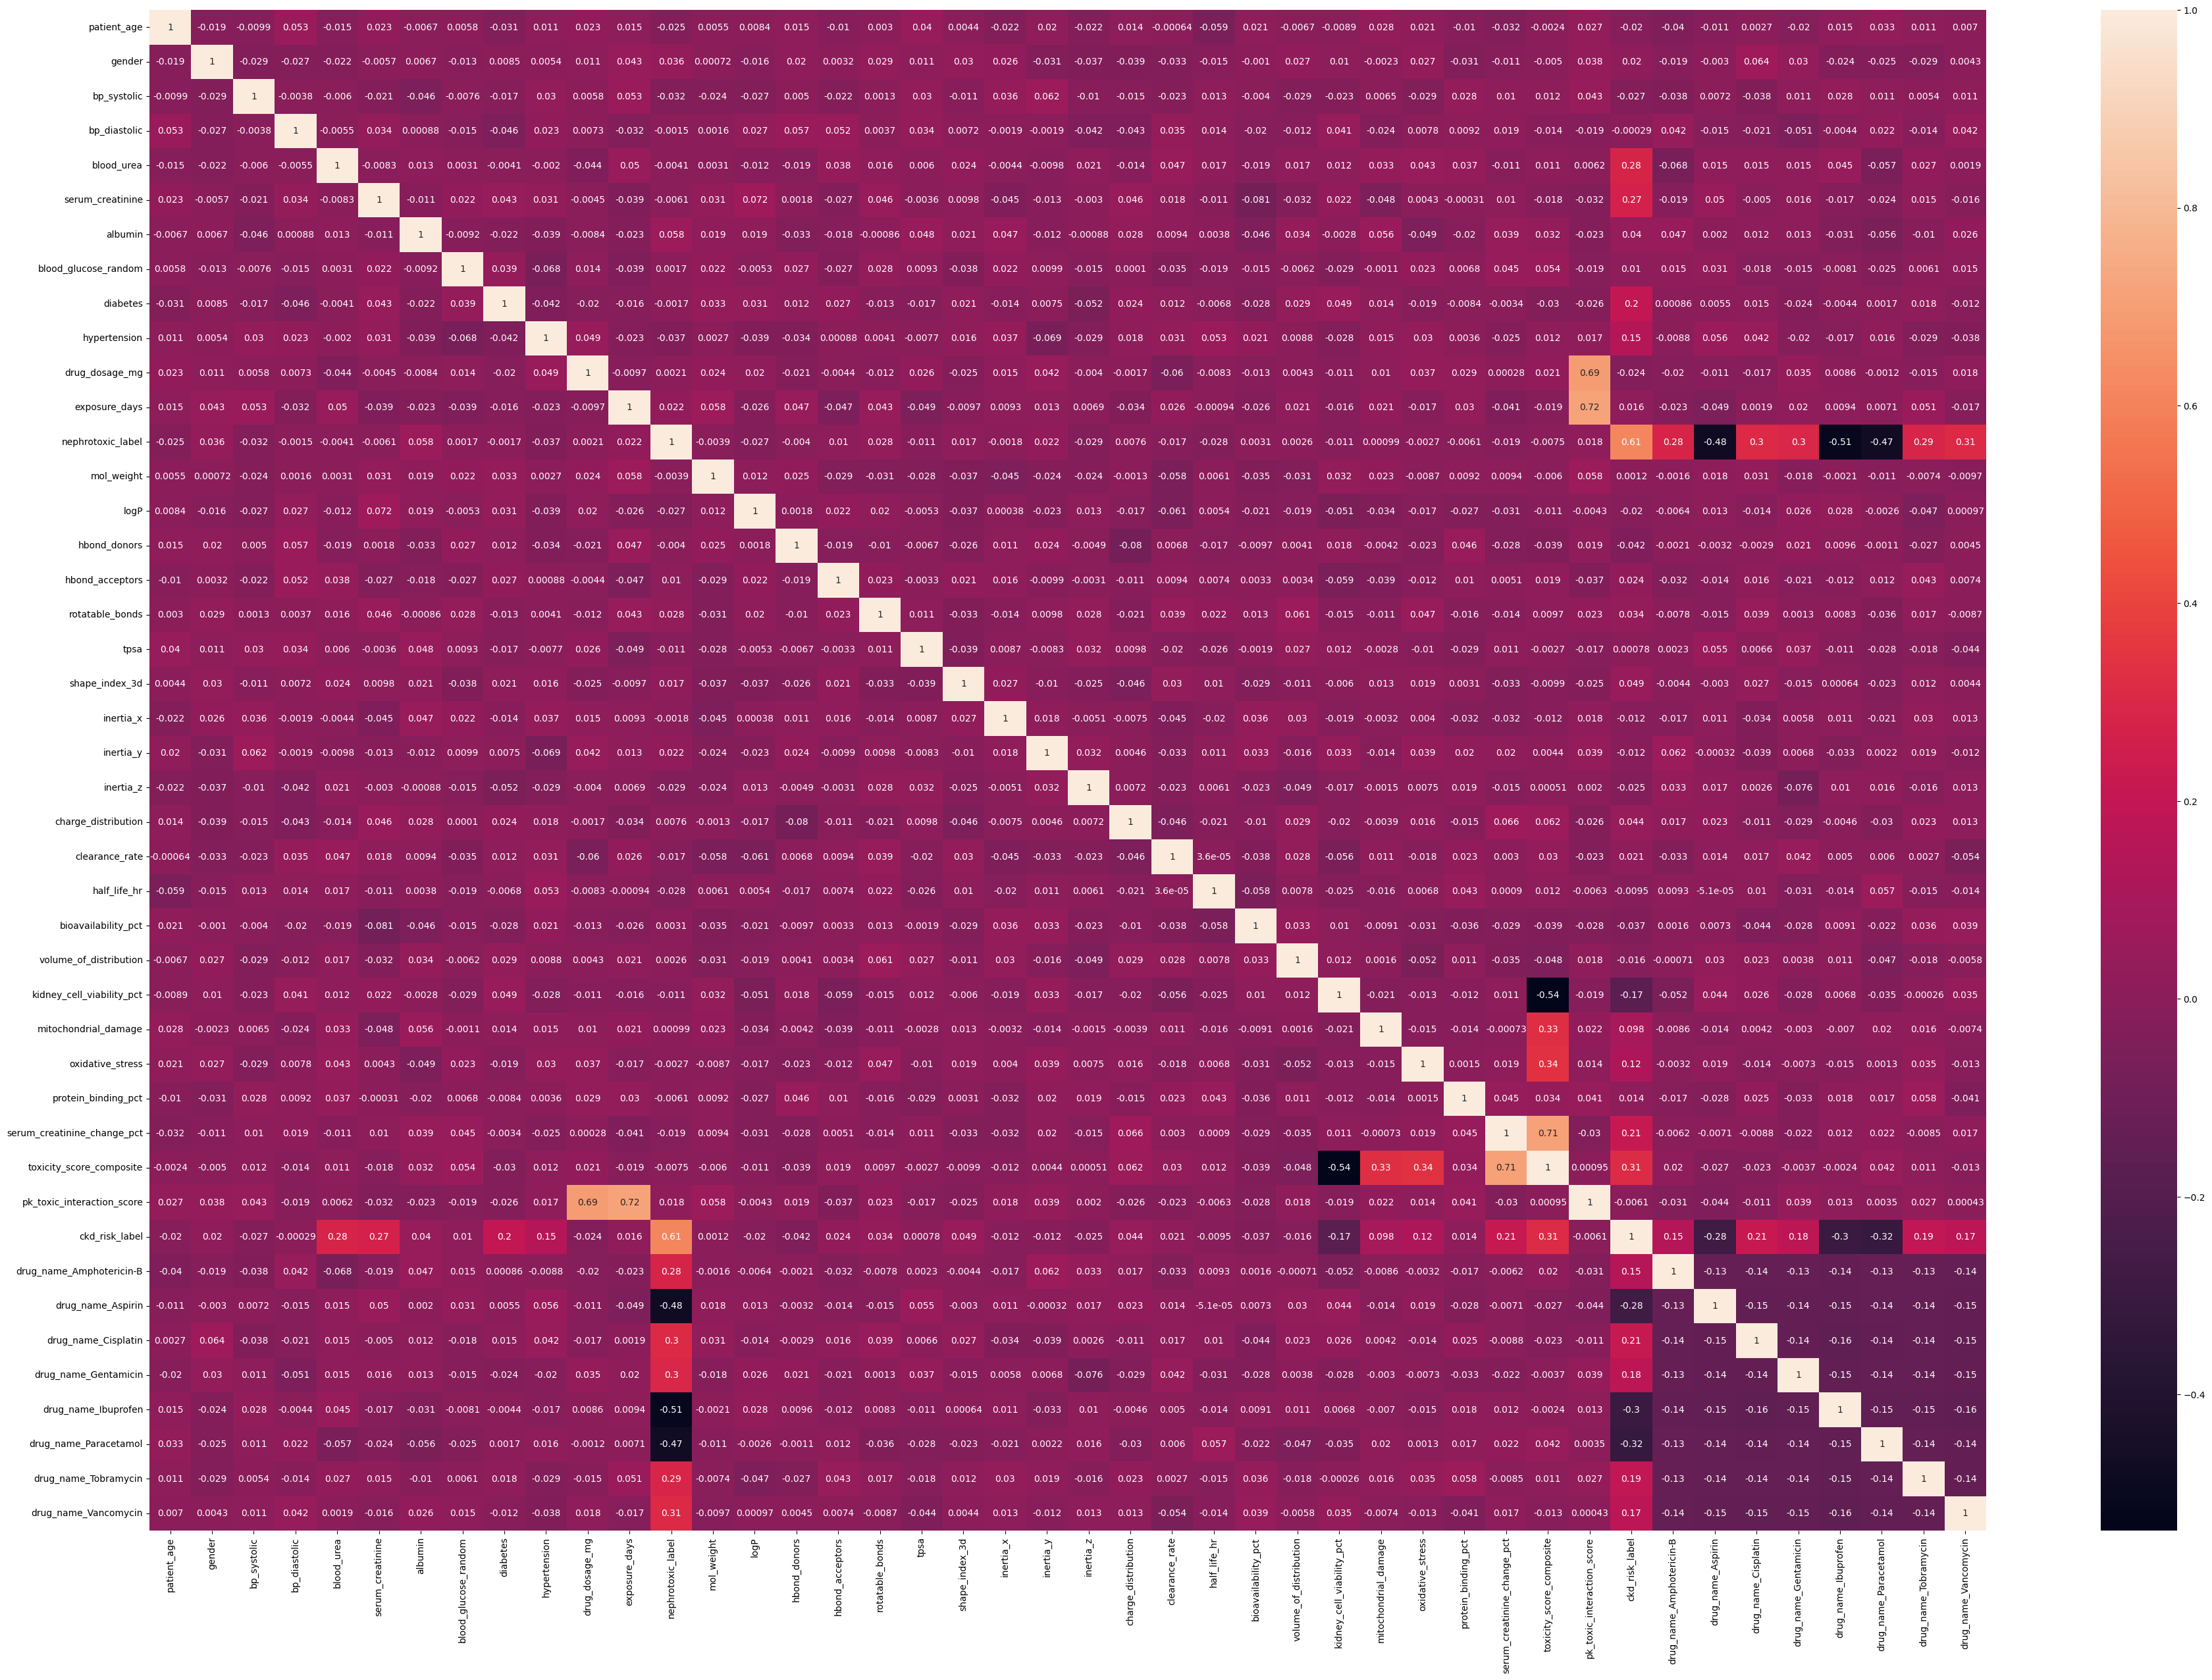

In [18]:
plt.figure(figsize= (45,30))
sns.heatmap(corr_df,annot = True)
plt.show()

In [19]:
pre_balance = df['ckd_risk_label'].value_counts()
print(pre_balance)

ckd_risk_label
1    728
2    393
0    379
Name: count, dtype: int64


In [20]:
X = df.drop(['ckd_risk_label'],axis = 1)
y = df['ckd_risk_label']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25, stratify = y)

In [22]:
print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

ckd_risk_label
1    0.485333
2    0.262000
0    0.252667
Name: proportion, dtype: float64
ckd_risk_label
1    0.485333
2    0.262222
0    0.252444
Name: proportion, dtype: float64
ckd_risk_label
1    0.485333
2    0.261333
0    0.253333
Name: proportion, dtype: float64


In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42, n_estimators = 300, class_weight='balanced')

In [24]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        95
           1       0.83      0.93      0.88       182
           2       0.98      0.83      0.90        98

    accuracy                           0.87       375
   macro avg       0.90      0.86      0.87       375
weighted avg       0.88      0.87      0.87       375



In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 77  18   0]
 [ 10 170   2]
 [  0  17  81]]


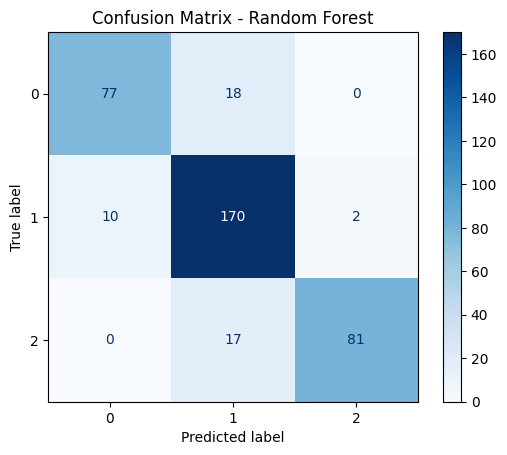

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

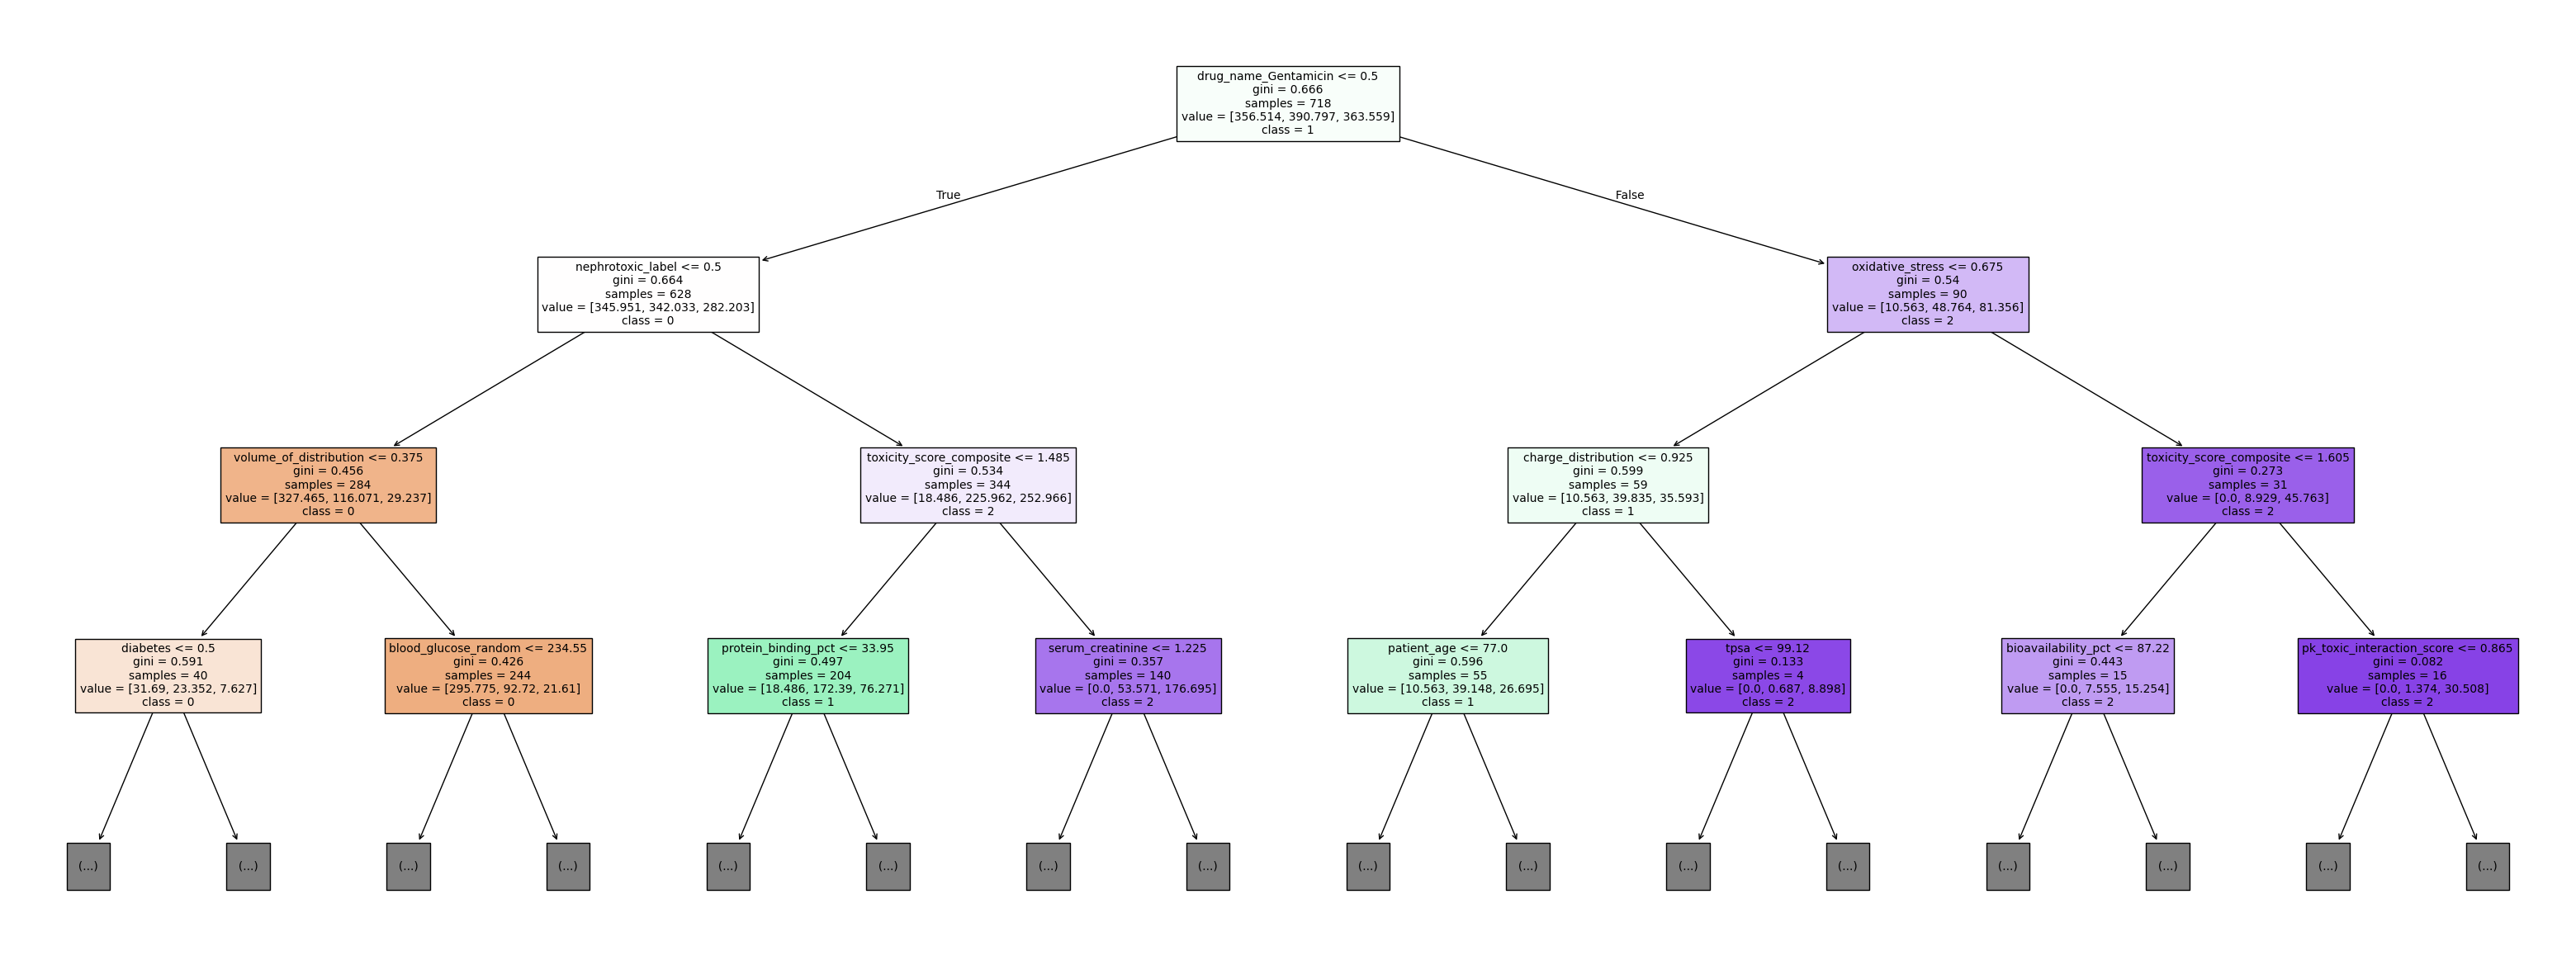

In [29]:
from sklearn.tree import plot_tree

tree = model.estimators_[0]

plt.figure(figsize = (40,15))
plot_tree(tree, feature_names = X_train.columns , class_names = ['0','1','2'], filled = True, max_depth = 3, fontsize = 10)
plt.show()

In [30]:
rf = RandomForestClassifier(random_state = 42)

In [31]:
param_dist = {
    'n_estimators' : [200,300,500],
    'max_depth' : [None, 10,20,30],
    'min_samples_leaf': [1,2],
    'min_samples_leaf': [2,5],
    'max_features' : ['sqrt', 'log2'],
    'class_weight' : ['balanced', 'balanced_subsample']
}

In [32]:
from sklearn.model_selection import RandomizedSearchCV

search = RandomizedSearchCV(
estimator = rf,
param_distributions = param_dist,
n_iter=20,
scoring='recall_macro',
cv=5,
n_jobs=-1,
random_state=42
)

In [33]:
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [2, 5],
                                        'n_estimators': [200, 300, 500]},
                   random_state=42, scoring='recall_macro')

In [34]:
best_model = search.best_estimator_

In [35]:
print(search.best_params_)

{'n_estimators': 500, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': 'balanced_subsample'}


In [36]:
y_pred1 = best_model.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85        95
           1       0.87      0.89      0.88       182
           2       0.95      0.90      0.92        98

    accuracy                           0.88       375
   macro avg       0.89      0.88      0.88       375
weighted avg       0.88      0.88      0.88       375



In [37]:
print("Old Model:")
print(classification_report(y_test, y_pred))

print("Recall-Optimized Model:")
print(classification_report(y_test, y_pred1))


Old Model:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        95
           1       0.83      0.93      0.88       182
           2       0.98      0.83      0.90        98

    accuracy                           0.87       375
   macro avg       0.90      0.86      0.87       375
weighted avg       0.88      0.87      0.87       375

Recall-Optimized Model:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        95
           1       0.87      0.89      0.88       182
           2       0.95      0.90      0.92        98

    accuracy                           0.88       375
   macro avg       0.89      0.88      0.88       375
weighted avg       0.88      0.88      0.88       375



In [38]:
import joblib
joblib.dump(best_model, "ckd_rf_recall_model.pkl")

['ckd_rf_recall_model.pkl']

In [39]:
print(X_train.shape)

(1125, 43)


In [40]:
X_train.columns

Index(['patient_age', 'gender', 'bp_systolic', 'bp_diastolic', 'blood_urea',
       'serum_creatinine', 'albumin', 'blood_glucose_random', 'diabetes',
       'hypertension', 'drug_dosage_mg', 'exposure_days', 'nephrotoxic_label',
       'mol_weight', 'logP', 'hbond_donors', 'hbond_acceptors',
       'rotatable_bonds', 'tpsa', 'shape_index_3d', 'inertia_x', 'inertia_y',
       'inertia_z', 'charge_distribution', 'clearance_rate', 'half_life_hr',
       'bioavailability_pct', 'volume_of_distribution',
       'kidney_cell_viability_pct', 'mitochondrial_damage', 'oxidative_stress',
       'protein_binding_pct', 'serum_creatinine_change_pct',
       'toxicity_score_composite', 'pk_toxic_interaction_score',
       'drug_name_Amphotericin-B', 'drug_name_Aspirin', 'drug_name_Cisplatin',
       'drug_name_Gentamicin', 'drug_name_Ibuprofen', 'drug_name_Paracetamol',
       'drug_name_Tobramycin', 'drug_name_Vancomycin'],
      dtype='object')

In [41]:
print('Pre tuning model:\n',confusion_matrix(y_test, y_pred))
print()
print('Post tuning model:\n',confusion_matrix(y_test, y_pred1))

Pre tuning model:
 [[ 77  18   0]
 [ 10 170   2]
 [  0  17  81]]

Post tuning model:
 [[ 81  14   0]
 [ 15 162   5]
 [  0  10  88]]


In [42]:
X_test.iloc[1]

patient_age                     69.00
gender                           0.00
bp_systolic                    136.50
bp_diastolic                    90.40
blood_urea                      45.30
serum_creatinine                 1.42
albumin                          2.00
blood_glucose_random           175.20
diabetes                         0.00
hypertension                     1.00
drug_dosage_mg                  83.00
exposure_days                   14.00
nephrotoxic_label                1.00
mol_weight                     298.33
logP                             3.45
hbond_donors                     6.00
hbond_acceptors                 10.00
rotatable_bonds                  3.00
tpsa                            31.74
shape_index_3d                   0.74
inertia_x                        9.40
inertia_y                       11.67
inertia_z                        6.69
charge_distribution              0.75
clearance_rate                   0.45
half_life_hr                     1.86
bioavailabil

In [43]:
y_test.iloc[1]

2

In [44]:
best_model.feature_names_in_

array(['patient_age', 'gender', 'bp_systolic', 'bp_diastolic',
       'blood_urea', 'serum_creatinine', 'albumin',
       'blood_glucose_random', 'diabetes', 'hypertension',
       'drug_dosage_mg', 'exposure_days', 'nephrotoxic_label',
       'mol_weight', 'logP', 'hbond_donors', 'hbond_acceptors',
       'rotatable_bonds', 'tpsa', 'shape_index_3d', 'inertia_x',
       'inertia_y', 'inertia_z', 'charge_distribution', 'clearance_rate',
       'half_life_hr', 'bioavailability_pct', 'volume_of_distribution',
       'kidney_cell_viability_pct', 'mitochondrial_damage',
       'oxidative_stress', 'protein_binding_pct',
       'serum_creatinine_change_pct', 'toxicity_score_composite',
       'pk_toxic_interaction_score', 'drug_name_Amphotericin-B',
       'drug_name_Aspirin', 'drug_name_Cisplatin', 'drug_name_Gentamicin',
       'drug_name_Ibuprofen', 'drug_name_Paracetamol',
       'drug_name_Tobramycin', 'drug_name_Vancomycin'], dtype=object)

In [49]:
importance = best_model.feature_importances_
features = best_model.feature_names_in_

fi_df = pd.DataFrame({'Features': features,
                     'Importance' : importance}).sort_values(ascending = False, by = 'Importance')
print(fi_df)

                       Features  Importance
12            nephrotoxic_label    0.202145
4                    blood_urea    0.100138
5              serum_creatinine    0.096597
33     toxicity_score_composite    0.090213
39          drug_name_Ibuprofen    0.033714
40        drug_name_Paracetamol    0.032619
32  serum_creatinine_change_pct    0.032035
8                      diabetes    0.027335
28    kidney_cell_viability_pct    0.025042
36            drug_name_Aspirin    0.024793
9                  hypertension    0.019877
29         mitochondrial_damage    0.014444
30             oxidative_stress    0.013944
2                   bp_systolic    0.013713
24               clearance_rate    0.013284
10               drug_dosage_mg    0.012745
0                   patient_age    0.012330
23          charge_distribution    0.012097
20                    inertia_x    0.011989
26          bioavailability_pct    0.011723
19               shape_index_3d    0.011594
22                    inertia_z 